In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KDTree
import statistics as stat
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [103]:
data_pr149 = pd.read_csv('10.csv')
data_pr149.describe()

filter_data = data_pr149[data_pr149['Valid'] ==1]
filter_data = filter_data.drop('Valid', 1)

filter_data['FpogX'] = filter_data['FpogX']*1920
filter_data['FpogY'] = filter_data['FpogY']*1080
filter_data.describe()

,QuestionId,Time,FpogX,FpogY
count,6836.000000,6836.000000,6836.000000,6836.000000
mean,8.913253,846.000372,1048.465666,554.507683
std,6.295242,41.701035,474.383341,358.519053
min,0.000000,775.318970,73.171200,-1.922400
25%,3.000000,809.455915,558.451200,157.042800
50%,9.000000,846.152710,1043.568000,528.789600
75%,14.000000,881.767162,1488.172800,954.879300
max,20.000000,918.416020,1930.924800,1118.178000


In [104]:
diff_x = np.diff(filter_data['FpogX'])
diff_y = np.diff(filter_data['FpogY'])
filter_data.drop(filter_data.tail(1).index,inplace=True)
filter_data.insert(4,'sd',np.sqrt(np.power(diff_x,2) + np.power(diff_y,2)))

sa = np.arctan2(diff_x,diff_y);
sa_deg = []
for i in sa:
    sa_deg.append(math.degrees(i))

filter_data.insert(5,'sa',sa_deg)
filter_data.describe()

,QuestionId,Time,FpogX,FpogY,sd,sa
count,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000
mean,8.911631,845.989778,1048.502317,554.466986,25.822623,3.724572
std,6.294274,41.694884,474.408368,358.529492,115.744148,101.888915
min,0.000000,775.318970,73.171200,-1.922400,0.000000,-179.758056
25%,3.000000,809.451810,558.451200,157.042800,2.045373,-85.710847
50%,9.000000,846.144350,1043.616000,528.746400,4.237971,7.409592
75%,14.000000,881.755580,1488.192000,954.909000,9.007151,89.074036
max,20.000000,918.399480,1930.924800,1118.178000,1533.356110,180.000000


In [105]:
macro_sequence_x = []
macro_sequence_y = []

flag = -1;
for (x,y) in zip(filter_data[filter_data['QuestionId'] == 1]['FpogX'],filter_data[filter_data['QuestionId'] == 1]['FpogY']):
    if x > 625.0 and x < 1289.0 and y > 112.0 and y < 175.0:
        if flag != 1:
            macro_sequence_x.append((1289.0+625.0)/2);
            macro_sequence_y.append((112.0+175.0)/2);
            flag = 1;
            #print('Naslov');
    elif x > 223.0 and x < 708.0 and y > 210.0 and y < 482.0:
        if flag != 2:
            macro_sequence_x.append((223.0+708.0)/2);
            macro_sequence_y.append((210.0+482.0)/2);
            flag = 2; 
            #print('Lav Slika');
    elif x > 223.0 and x < 708.0 and y > 498.0 and y < 585.0:
        if flag != 3:
            macro_sequence_x.append((223.0+708.0)/2);
            macro_sequence_y.append((498.0+585.0)/2);
            flag = 3;
            #print('Lav');
    elif x > 1234.0 and x < 1719.0 and y > 210.0 and y < 482.0:
        if flag != 4:
            macro_sequence_x.append((1234.0+1719.0)/2);
            macro_sequence_y.append((210.0+482.0)/2);
            flag = 4;
            #print('Medved Slika');
    elif x > 1234.0 and x < 1719.0 and y > 498.0 and y < 585.0:
        if flag != 5:
            macro_sequence_x.append((1234.0+1719.0)/2);
            macro_sequence_y.append((498.0+585.0)/2);
            flag = 5;
            #print('Medved');
    elif x > 223.0 and x < 708.0 and y > 596.7 and y < 919.0:
        if flag != 6:
            macro_sequence_x.append((223.0+708.0)/2);
            macro_sequence_y.append((597.0+919.0)/2);
            flag = 6;
            #print('Nilski Slika');
    elif x > 223.0 and x < 708.0 and y > 925.0 and y < 1010.96:
        if flag != 7:
            macro_sequence_x.append((223.0+708.0)/2);
            macro_sequence_y.append((925.0+1013.0)/2);
            flag = 7;
            #print('Nilski');
    elif x > 1234.0 and x < 1719.0 and y > 597.0 and y < 919.0:
        if flag != 8:
            macro_sequence_x.append((1234.0+1719.0)/2);
            macro_sequence_y.append((597.0+919.0)/2);
            flag = 8;
            #print('Slon Slika');
    elif x > 1234.0 and x < 1719.0 and y > 925.0 and y < 1011.0:
        if flag != 9:
            macro_sequence_x.append((1234.0+1719.0)/2);
            macro_sequence_y.append((925.0+1011.0)/2);
            flag = 9;
            #print('Slon');

## Provera sekvence studentovog pogleda za prvo pitanje

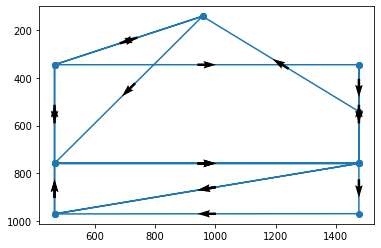

In [106]:
x = macro_sequence_x
y = macro_sequence_y

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots()

ax.plot(x,y, marker="o")
ax.set_ylim(ax.get_ylim()[::-1]);
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

pomereno
pomereno
pomereno
pomereno
pomereno
pomereno
pomereno


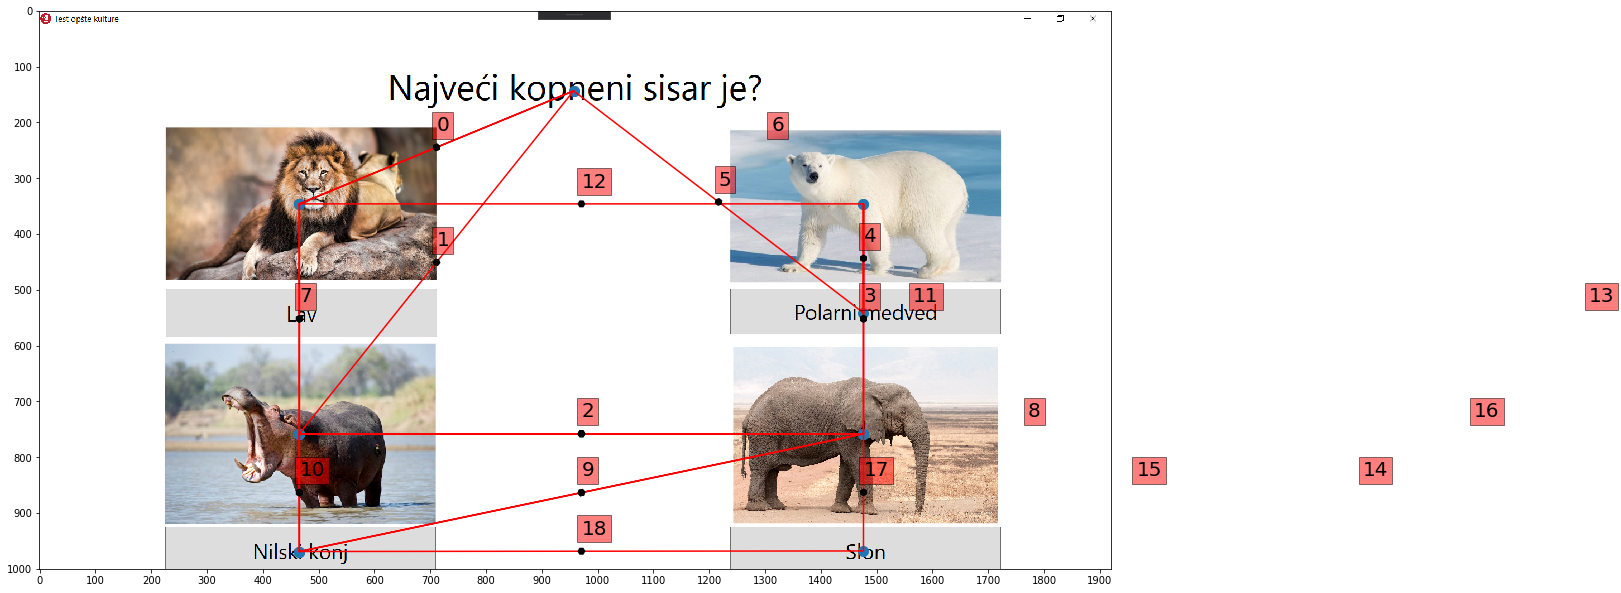

In [126]:
x = macro_sequence_x
y = macro_sequence_y

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

plt.figure(figsize=(19.20,10.80))
img = mpimg.imread('E:/1.png');
ax = plt.gca();
ax.set_ylim(ax.get_ylim()[::-1]);
imgplot = plt.imshow(img);
plt.scatter(macro_sequence_x,macro_sequence_y,s=100);
#plt.quiver(macro_sequence_x,macro_sequence_y,np.cos(macro_sequence_x),np.sin(macro_sequence_y))
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy",scale_units='xy', scale=5, zorder=5, pivot="tail")
plt.plot(macro_sequence_x,macro_sequence_y, c='r');
arr= []

for i in range(0,len(pos_x)):
    exist = 0
    for j in range(0,len(arr)):
        if pos_x[i] == arr[j][0] and pos_y[i] == arr[j][1]:
            exist = 1
    if exist != 0:   
        print('pomereno')
        plt.plot(pos_x[i], pos_y[i])
        plt.text(pos_x[i]+i*100, pos_y[i]-30, '{i}'.format(i=i),fontsize=20,bbox=dict(facecolor='red', alpha=0.5) )
    else:
        plt.plot(pos_x[i], pos_y[i])
        plt.text(pos_x[i], pos_y[i]-30, '{i}'.format(i=i),fontsize=20,bbox=dict(facecolor='red', alpha=0.5))
    arr.append([pos_x[i],pos_y[i]])
plt.xticks(np.arange(0, 1920, step=100));
plt.yticks(np.arange(0, 1080, step=100));


In [38]:
v = []
macro_diff_x = np.diff(macro_sequence_x)
macro_diff_y = np.diff(macro_sequence_y)
macro_sa = np.round(np.arctan2(macro_diff_y,macro_diff_x)*180/np.pi,2);


for i in macro_sa:
    if i < 135 and i >=45:
        v.append('d')
    elif (i< 45 and i>=0) or (i >=-45 and i<0):
        v.append('r')
    elif i>= -135 and i<-45:
        v.append('u')
    elif (i<-135 and i >=-180) or (i >=135 and i<=180):
        v.append('l')
    else :
        print(i);

In [520]:



tupples = [];
t = np.round(np.sqrt(np.power(macro_diff_x,2) + np.power(macro_diff_y,2)),2);
for i in range(0,len(v)):
    tupples.append((t[i],v[i]))
print(tupples)



[(1029.73, 'l'), (1011.0, 'r'), (195.5, 'd'), (654.43, 'l'), (786.88, 'd'), (1011.0, 'r'), (210.0, 'd'), (210.0, 'u'), (412.0, 'u'), (412.0, 'd'), (210.0, 'd'), (210.0, 'u')]


In [521]:
df.loc[df.shape[0]] = [tupples]
df.tail()

,Question1
21,"[(531.58, r), (531.58, l), (1029.73, r), (216...."
22,"[(531.58, r), (557.57, r), (1091.73, l), (412...."
23,"[(1091.73, l), (195.5, d), (195.5, u), (531.58..."
24,"[(1091.73, r), (1011.0, l), (211.0, d), (211.0..."
25,"[(1029.73, l), (1011.0, r), (195.5, d), (654.4..."


In [293]:
#df = pd.DataFrame(columns=['Question1'])

In [523]:
df.to_csv(path_or_buf="moj.csv")

In [553]:
from sgt import Sgt
sgt = Sgt(kappa = 0.9, lengthsensitive = False)
embedding = sgt.fit_transform(corpus=df['Question1'])

In [550]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(embedding)
X = pca.transform(embedding)
print(np.sum(pca.explained_variance_ratio_))
X[:,0]

0.5741694807912352


array([-0.31163691, -0.13280783, -0.59858586, -0.39179743, -0.32226443,
       -0.57444469, -0.57444469, -0.32933896,  0.4881554 ,  0.03912565,
       -0.46329303,  0.1087218 , -0.25947536, -0.37650529, -0.16215727,
        0.50422923,  1.0252764 , -0.05135748,  0.9666239 ,  0.9666239 ,
       -0.27127481, -0.08969611,  1.07176712, -0.0259507 , -0.10567641,
       -0.12981613])

In [551]:
from sklearn.cluster import KMeans
>>> kmeans = KMeans(n_clusters=6, max_iter =300)
>>> kmeans.fit(embedding)
>>> labels = kmeans.predict(embedding)
print(labels)
>>> centroids = kmeans.cluster_centers_
print(labels)
#>>> fig = plt.figure(figsize=(5, 5))
#>>> colmap = {1: 'r', 2: 'g', 3: 'b'}
#>>> colors = list(map(lambda x: colmap[x+1], labels))
#>>> plt.scatter(X['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

[2 2 4 3 5 0 0 2 5 5 4 5 4 0 5 5 1 5 1 1 0 5 1 5 5 5]
[2 2 4 3 5 0 0 2 5 5 4 5 4 0 5 5 1 5 1 1 0 5 1 5 5 5]


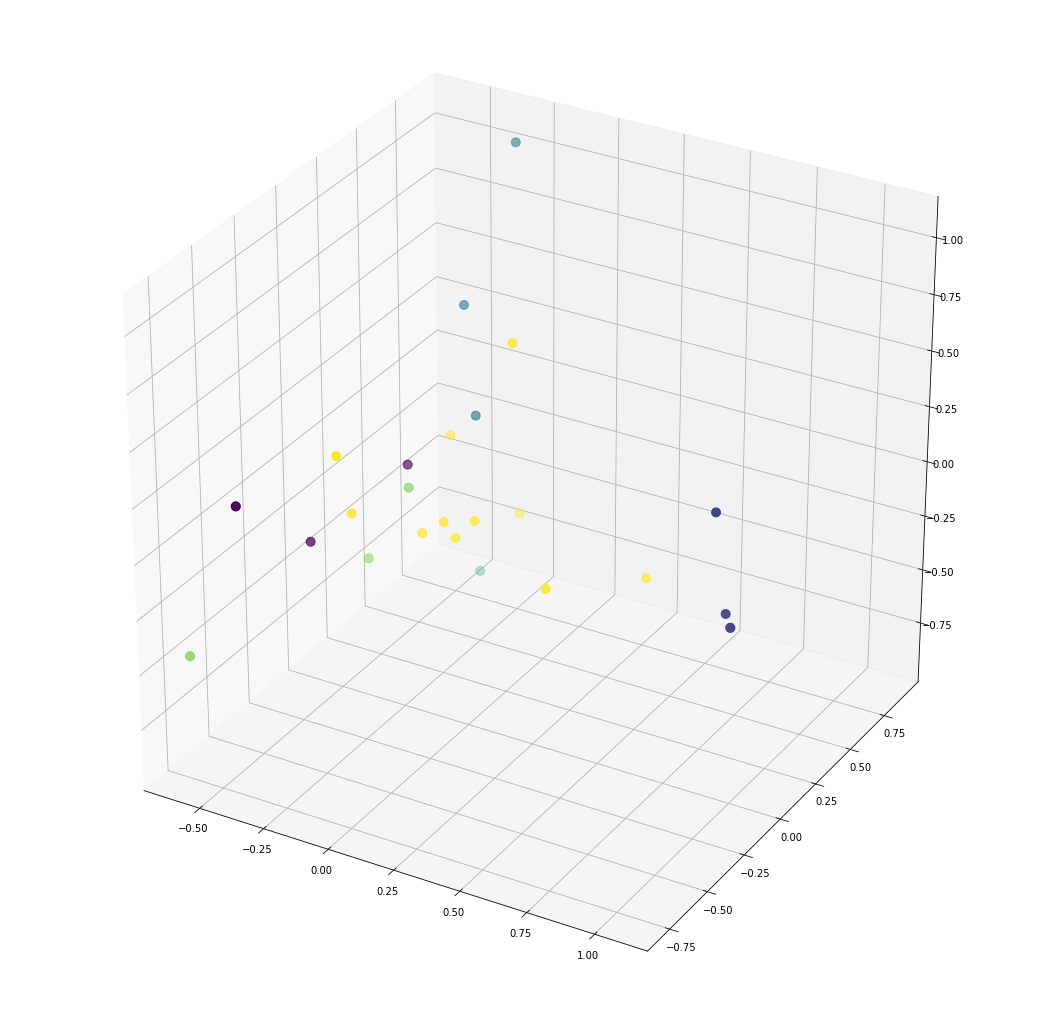

In [554]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)
ax = fig.add_subplot(111, projection='3d')
colmap = {1: 'r', 2: 'g', 3: 'b'}
#ax.plot(fpog_x, fpog_y, time,  c='r', marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2],s=80,  c=labels)
#diff_x = np.diff(fpog_x)  
#diff_y = np.diff(fpog_y)